# 1.Opis

Postawiony przed nami problem to analiza płac w San Francisco. Celami analizy są:
- porównanie zmian w płacach różnych grup ludzi na przestrzeni lat 2011-1014
- sprawdzenie, jak podstawowa płaca, płaca za nadgodziny, premie, są rozalokowane w różnych grupach
- sprawdzenie, czy są dowody na to, że dochodzi do dyskryminacji ze względu na płeć w przełożeniu na płacę
- sprawdzenie, jak budżet jest rozalokowany na podstawie różnych grup i odpowiedzialności

Do zrealizowania wyżej postawionych celów należy:
- przypisać ludzi do grup
- przypisać ludzi do płci
- przypisać ludzi do odpowiedzialności

Dostarczone dane:
- Id - identyfikuje wiersz, nieprzydatne ze względu na cele biznesowe
- EmployeeName - imię i nazwisko osoby, przydatne do przypisania płci
- JobTitle - tytuł posady, przydatne do określenia grupy jak i odpowiedzialności
- BasePay - płaca podstawowa, przydatne do określenia płac na przestrzeni lat
- OvertimePay - płaca za nadgodziny, przydatne do określenia płac na przestrzeni lat
- OtherPay - płaca dodatkowa, przydatne do określenia płac na przestrzeni lat
- Benefits - premie, przydatne do określenia płac na przestrzeni lat
- TotalPay - suma wszystkich płac, przydatne do określenia płac na przestrzeni lat
- TotalPayBenefits - suma wszystkich płac plus premie
- Year - rok, przydatny do określenia płac na przestrzeni lat
- Notes - notatki, nieprzydatne ponieważ nigdzie nie jest wypełnione
- Agency - agencja, nieprzydatne ponieważ zawiera jędną wartość 'San Francisco'
- Status - typ zatrudnienia (pełen etat/niepełny etat)

Załadowanie bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Załadowanie danych

In [2]:
data = pd.read_table('Salaries.csv',sep=',')

C:\Program Files\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Analiza wstępna

Z powodu tego, że dostarczone dane zawierają niepoprawne wartości - np. w kolumnach z atrybutami ilościowymi znajdują wartości tekstowe - zmuszeni zostaliśmy do przeprowadzenia analizy wstępnej i przygotowanie na jej podstawie danych do dalszej analizy.


In [3]:
print "Liczba wierszy: " + str(len(data))

Liczba wierszy: 148654


Poziom wypełnienia kolumn

In [4]:
def get_fill(column):
    return str(float(column.notnull().sum())/len(column)*100)

print "Wypełnienie Id: " + get_fill(data.Id) + "%"
print "Wypełnienie EmployeeName: " + get_fill(data.EmployeeName) + "%"
print "Wypełnienie JobTitle: " + get_fill(data.JobTitle) + "%"
print "Wypełnienie BasePay: " + get_fill(data.BasePay) + "%"
print "Wypełnienie OvertimePay: " + get_fill(data.OvertimePay) + "%"
print "Wypełnienie OtherPay: " + get_fill(data.OtherPay) + "%"
print "Wypełnienie Benefits: " + get_fill(data.Benefits) + "%"
print "Wypełnienie TotalPay: " + get_fill(data.TotalPay) + "%"
print "Wypełnienie TotalPayBenefits: " + get_fill(data.TotalPayBenefits) + "%"
print "Wypełnienie Year: " + get_fill(data.Year) + "%"
print "Wypełnienie Notes: " + get_fill(data.Notes) + "%"
print "Wypełnienie Agency: " + get_fill(data.Agency) + "%"
print "Wypełnienie Status: " + get_fill(data.Status) + "%"

Wypełnienie Id: 100.0%
Wypełnienie EmployeeName: 100.0%
Wypełnienie JobTitle: 100.0%
Wypełnienie BasePay: 99.5930146515%
Wypełnienie OvertimePay: 100.0%
Wypełnienie OtherPay: 100.0%
Wypełnienie Benefits: 75.6757302192%
Wypełnienie TotalPay: 100.0%
Wypełnienie TotalPayBenefits: 100.0%
Wypełnienie Year: 100.0%
Wypełnienie Notes: 0.0%
Wypełnienie Agency: 100.0%
Wypełnienie Status: 25.6427677695%


Wszak trzeba zauważyć, że pola liczbowe niezawierające danych są odpowiednikiem wypełnienia zarami.

Ilość unikalnych danych wraz z niepoprawnymi wartościami

In [5]:
print "Ilość unikalnych wartości (wraz z niewypełnioną):"
print "dla kolumny Id: " + str(len(data.Id.unique()))
print "dla kolumny EmployeeName: " + str(len(data.EmployeeName.unique()))
print "dla kolumny JobTitle: " + str(len(data.JobTitle.unique()))
print "dla kolumny BasePay: " + str(len(data.BasePay.unique()))
print "dla kolumny OvertimePay: " + str(len(data.OvertimePay.unique()))
print "dla kolumny OtherPay: " + str(len(data.OtherPay.unique()))
print "dla kolumny Benefits: " + str(len(data.Benefits.unique()))
print "dla kolumny TotalPay: " + str(len(data.TotalPay.unique()))
print "dla kolumny TotalPayBenefits: " + str(len(data.TotalPayBenefits.unique()))
print "dla kolumny Year: " + str(len(data.Year.unique()))
print "dla kolumny Notes: " + str(len(data.Notes.unique()))
print "dla kolumny Agency: " + str(len(data.Agency.unique()))
print "dla kolumny Status: " + str(len(data.Status.unique()))



Ilość unikalnych wartości (wraz z niewypełnioną):
dla kolumny Id: 148654
dla kolumny EmployeeName: 110811
dla kolumny JobTitle: 2159
dla kolumny BasePay: 109901
dla kolumny OvertimePay: 66555
dla kolumny OtherPay: 84968
dla kolumny Benefits: 99636
dla kolumny TotalPay: 138486
dla kolumny TotalPayBenefits: 142098
dla kolumny Year: 4
dla kolumny Notes: 1
dla kolumny Agency: 1
dla kolumny Status: 3


Liczba zduplikowanych wierszy:

In [6]:
print "Liczba powtarzających się wierszy: " + str(data.duplicated().sum())

Liczba powtarzających się wierszy: 0


# Przygotowanie danych do analizy - usunięcie zbędnych kolumn

Kolumna Id nie zawiera danych, które mogłyby zostać wykorzystane, dlatego postanowiliśmy ją usunąć

In [7]:
data.drop(["Id"],1,inplace=True)

Z powodu tego, że kolumna Notes nie zawiera żadnych atrybutów postanowiliśmy ją usunąć, gdyż nic nie wnosi.

In [8]:
data.drop(["Notes"],1,inplace=True)

Kolumna Agency zawiera tylko jedną wartość 'San Francisco', dlatego postanowiliśmy ją usunąć, gdyż nic nie wnosi.

In [9]:
data.drop(["Agency"],1,inplace=True)

# Przygotowanie danych do analizy - wypełnienie brakujących atrybutów

In [10]:
data.BasePay.fillna(0, inplace=True)
data.Benefits.fillna(0, inplace=True)

# Przygotowanie danych do analizy - normalizacja danych

In [11]:
data['EmployeeName'] = data['EmployeeName'].apply(lambda x: x.upper())
data['JobTitle'] = data['JobTitle'].apply(lambda x: x.upper())

# Przygotowanie danych do analizy - usunięcie zbędnych wierszy

In [12]:
data = data[data.JobTitle != "NOT PROVIDED"]

# 2.3 Zakresy zmienności atrybutów i wartości statystycznych

In [13]:
#data.BasePay.hist(color='b', alpha=0.5, bins=100)

In [14]:
#data.Benefits.hist(color='b', alpha=0.5, bins=100)

In [15]:
#data.OtherPay.hist(color='b', alpha=0.5, bins=100)

In [16]:
#data.OvertimePay.hist(color='b', alpha=0.5, bins=100)

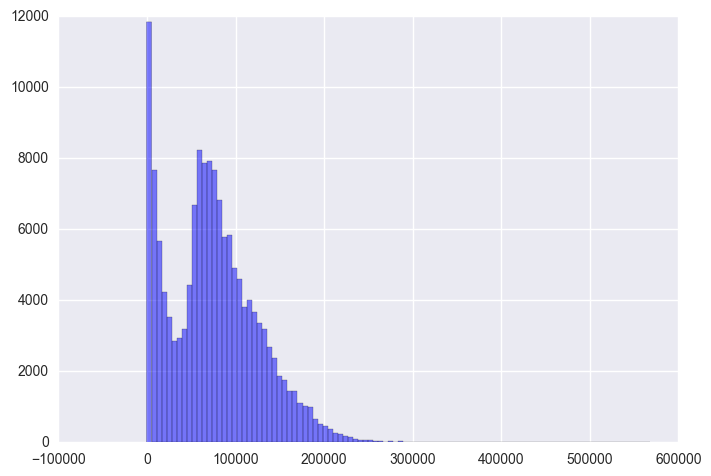

In [17]:
data.TotalPay.hist(color='b', alpha=0.5, bins=100)

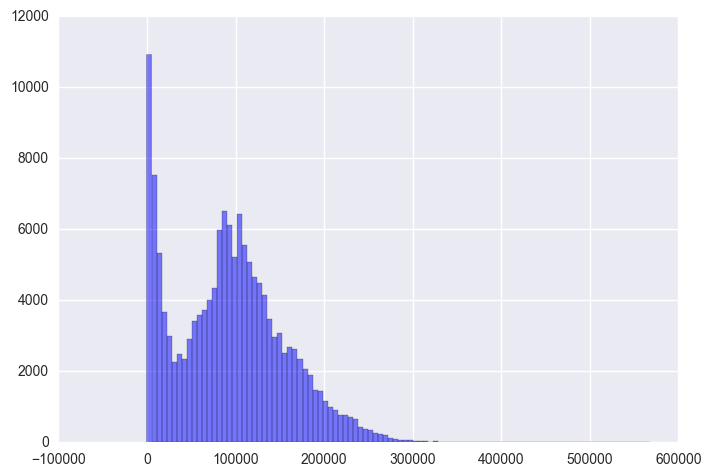

In [18]:
data.TotalPayBenefits.hist(color='b', alpha=0.5, bins=100)

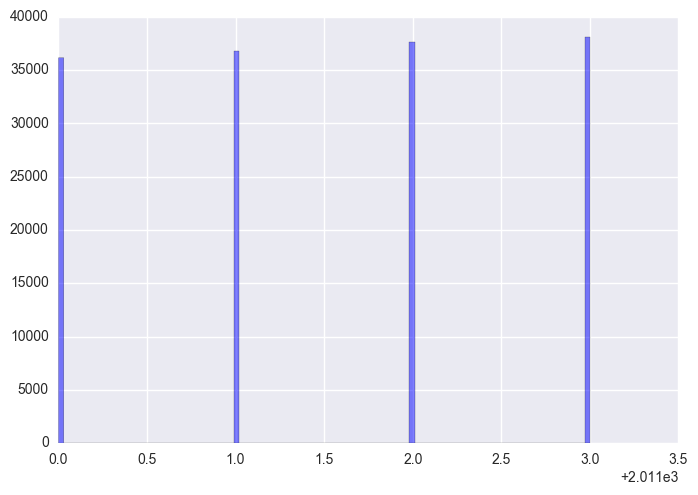

In [19]:
data.Year.hist(color='b', alpha=0.5, bins=100)

# 3. Korelacje między zmiennymi

In [20]:
data.corr(method='pearson', min_periods=1)

,TotalPay,TotalPayBenefits,Year
TotalPay,1.000000,0.977312,0.032145
TotalPayBenefits,0.977312,1.000000,0.152009
Year,0.032145,0.152009,1.000000
